# Máster Universitario en Lógica, Computación e Inteligencia Artificial
## Inteligencia Artificial para la Ciencia de los Datos
### Proyecto de Ciencia de datos

En este segundo entregable se pide aplicar todo lo visto en la asignatura para desarrollar un proyecto de ciencia de datos que completo sobre un conjunto de datos (de libre elección). 
El objetivo final será obtener un modelo predictivo con la mayor capacidad predictiva posible, sin embargo, todas las tareas desarrolladas para obtenerlo son igualmente importantes. Esto incluye las siguientes tareas:
* Exploración y visualización mediante gráficos.
* Limpieza y preprocesado de los datos. 
* Ingeniería y selección de características. El uso de técnicas de selección de características y/o de reducción de la dimensionalidad será decisión del alumno.
* Aprendizaje de modelos predictivos (clasificación o regresión). Debe probarse más de un algoritmo para obtener el mayor rendimiento posible.
* Validación, ajuste (de hiper-parámetros) y evaluación (métricas) de los distintos modelos candidatos
* Evaluación final del modelo finalmente seleccionado y presentación de resultados.

El trabajo debe ser presentado mediante un notebook de Jupyter, intercalando texto, código Python y gráficos, si fueran necesarios. Se permite y se valorará la exploración de técnicas no vistas en clase. Para el desarrollo de este trabajo, las librerías más útiles son pandas, numpy, matplotlib y scikit-learn aunque se permite el uso de librerías adicionales a discreción del alumno.

### Conjuntos de datos
El conjunto de datos sobre el que hacer el estudio es de libre elección. Sin embargo, se recomienda que tenga la complejidad suficiente como para poder poner en práctica todo lo visto en clase (por ejemplo, el conjunto de datos iris es demasiado sencillo). Por ejemplo, es buena idea elegir un conjunto de datos que tenga valores perdidos, que tenga variables tanto numéricas como categóricas y que tenga (o se puedan crear) suficientes variables como para aplicar técnicas de selección de características. A continuación se proporcionan algunos repositorios donde buscar conjuntos de datos:
* Alguno de los conjuntos de datos en [apispreadsheets](https://www.apispreadsheets.com/datasets)
* Alguno de los conjuntos de datos de [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
* Alguno de los conjuntos de datos del repositiorio de [Kaggle](https://www.kaggle.com/datasets)
* Alguno de los conjuntos de datos del repositiorio de [OpenML](https://www.openml.org/search?type=data)

Aunque la mayor parte del contenido visto en clase se centra en problemas de clasificación, el trabajo puede realizarse sobre un problema de regresión si así se desea.

### Integrantes
Germán Lorenz Vieta<br>
Pilar Saez Guerra<br>

Última actualización: 27 de Junio de 2022

## Presentación
En este trabajo analizaremos datos sobre Breast Cancer Coimbra (cáncer de mama)

* Tipo de Datos: Multivariate 
* Modo: Classification 
* Tipos: Integer 
* Casos: 116 
* Atributos: 10 
* Año: 2018

El repositorio de la Universidad de California con sus datyos se encuentran [aquí](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra).  Las caracteristicas clinicas de interes fueron obtenidas de 64 pacientes con cancer de mama y 52 personas sanas. Los atributos son:

* Edad (años)
* IMC (kg/m2)
* Glucosa (mg / dL)
* Insulina (µU / mL)
* HOMA
* Leptina (ng / mL)
* Adiponectina (µg / mL)
* Resistina (ng / mL)
* MCP-1 (pg / dL)
* Clasificación

In [1]:
## Verificación de librerias en el contexto de ejecución
libraryList = !{sys.executable} -m pip list

### Exploración y visualización mediante gráficos
Cargamos el archivo <i> dataR2.xls </i> con pandas.

In [2]:
if len(list(filter(lambda x: 'pandas ' in x, libraryList))) == 0:
    !{sys.executable} -m pip install pandas
    
import pandas as pd
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

data = pd.read_excel('dataR2.xls', header = 0)
data

zsh:1: parse error near `-m'


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


Hagamos un estudio estadistico basico:

zsh:1: parse error near `-m'


count    116.000000
mean      57.301724
std       16.112766
min       24.000000
25%       45.000000
50%       56.000000
75%       71.000000
max       89.000000
Name: Age, dtype: float64

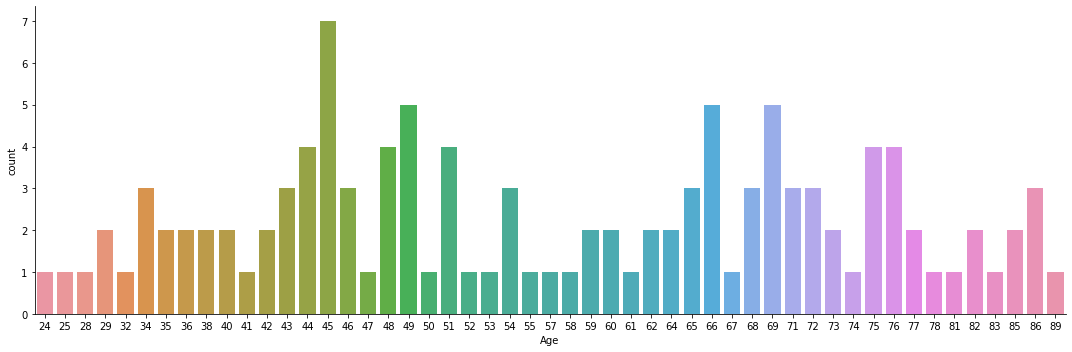

In [3]:
if len(list(filter(lambda x: 'seaborn ' in x, libraryList))) == 0:
    !{sys.executable} -m pip install seaborn
    
import seaborn as sns
sns.catplot('Age',data=data,kind="count", aspect=3)

data['Age'].describe()

En el estudio hay personas de edad entre `24` y `89` años, siendo los mismos muy heterogeneos y con muestras significativas en algunas edades como `45` y `49` años.

Consideremos entonces que nos muestra la Glucosa:

count    116.000000
mean      97.793103
std       22.525162
min       60.000000
25%       85.750000
50%       92.000000
75%      102.000000
max      201.000000
Name: Glucose, dtype: float64

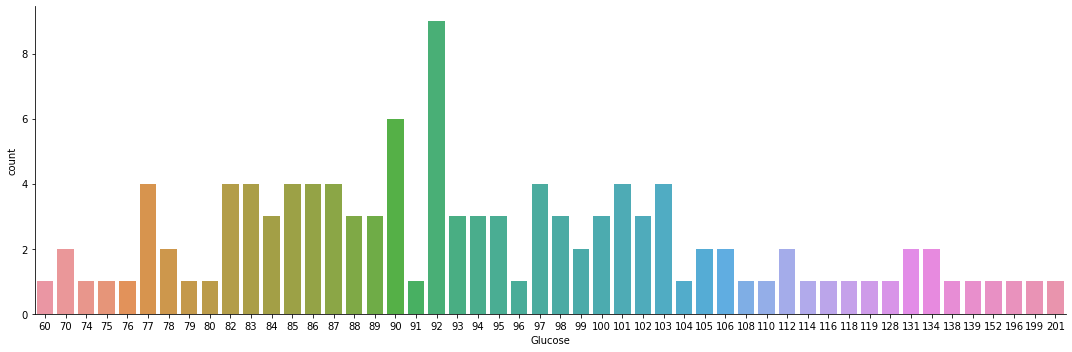

In [4]:
sns.catplot('Glucose',data=data,kind="count", aspect=3)
data['Glucose'].describe()

Se puede observar que el valor común es `92`, teniendo rango entre `60` a `20` mg /dL. Se puede hacer este estudio para el resto de variables pero no se obtienen resultados significantes ya que todas tiene valores casi no repetibles

Agrupemos el conjunto de datos según la clasificación y ver las características entre personas sanas y personas con cáncer. Veamos sus medias:

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Classification,,,,,,,,,
1,58.076923,28.317336,88.230769,6.933769,1.552398,26.637933,10.328205,11.614813,499.730692
2,56.671875,26.984740,105.562500,12.513219,3.623342,26.596512,10.061167,17.253777,563.016500


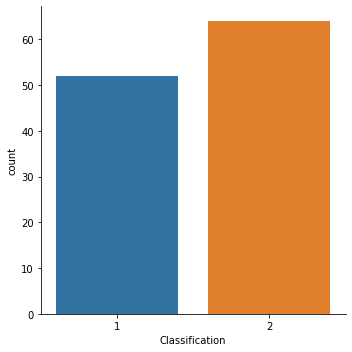

In [5]:
sns.catplot('Classification',data=data,kind="count")

grouped_data = data.groupby('Classification')
grouped_data.mean()

Podemos ver que el grupo 2 toma valores mas altos para la mayoria de indicadores excepto el BMI entre otros.

### Limpieza y preprocesado de los datos. 
Analizaremos los datos en busqueda de incongruencias


Verificamos si existen valores nulos en la información proporcionada

In [6]:
nulos = data.isnull().any()
print (nulos)

Age               False
BMI               False
Glucose           False
Insulin           False
HOMA              False
Leptin            False
Adiponectin       False
Resistin          False
MCP.1             False
Classification    False
dtype: bool


No tenemos datos nulos. Si hubieran existido con la función <i> fillna </i> los hubieramos sustituido por ejemplo con la media de la columna agregando un primer sesgo a la información

Verificamos el tipo de dato de cada columna:

In [7]:
data.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

Verificamos los datos del clasificador de pacientes:

In [8]:
pd.unique(data['Classification'])

array([1, 2])

Entonces observemos en mas profundidad los datos:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


### Ingeniería y selección de características

Definamos el conjunto X de variables predictoras y el conjunto Y de la variable objetivo:

In [10]:
if len(list(filter(lambda x: 'numpy ' in x, libraryList))) == 0:
    !{sys.executable} -m pip install numpy
    
import numpy as np

X_data = data.iloc[:,0:9]
X_data
y_data = np.asarray(data["Classification"]).tolist()
X_names = X_data.columns.tolist()
y_names = ['Sanos', 'Pacientes']

zsh:1: parse error near `-m'


Luego para saber como se distribuyen los datos vamos a usar el método `scatter_matrix`. En color morado corresponden las personas sanas (1) y el color amarillo a los pacientes (2).

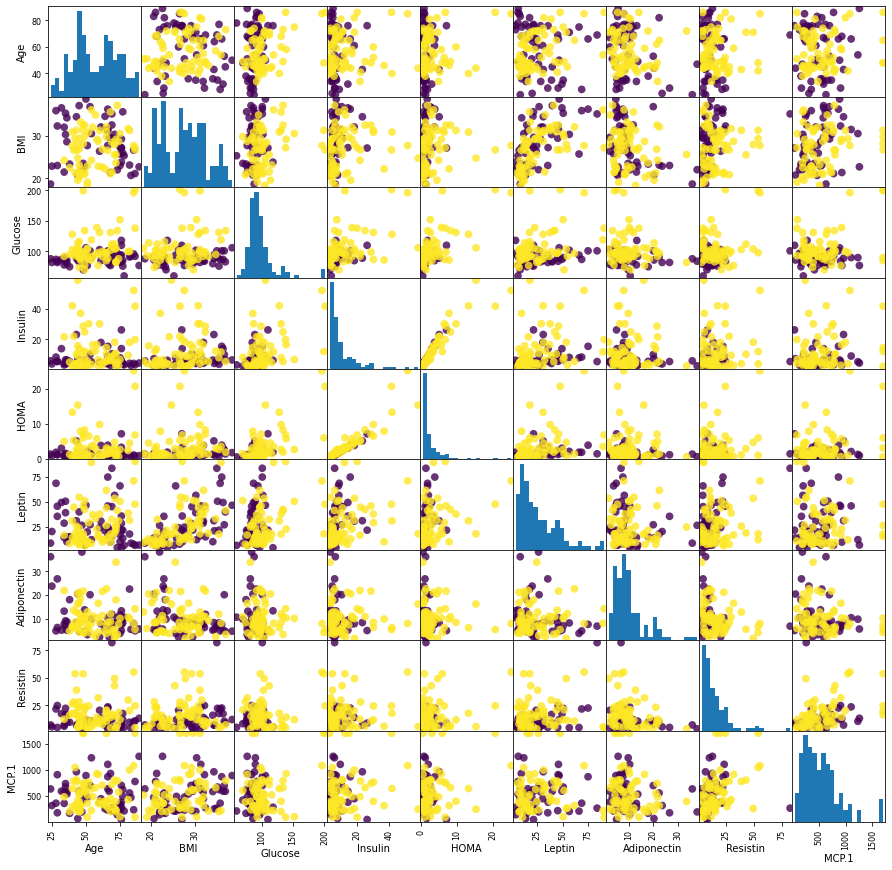

In [11]:
sp = pd.plotting.scatter_matrix(X_data, c=y_data, figsize=(15, 15), 
               marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

La dispersion segun se visualiza es alta asi que la clasificacion sera compleja. 

Este concepto se puede ver mejor viendo una estimacion sobre como se relacionan las variables usando el coeficiente de correlación de Pearson en un mapa de calor que nos proporciona la libreria Seaborn:

zsh:1: parse error near `-m'


<AxesSubplot:title={'center':'Coeficiente de Correlación de Pearson entre los atributos'}>

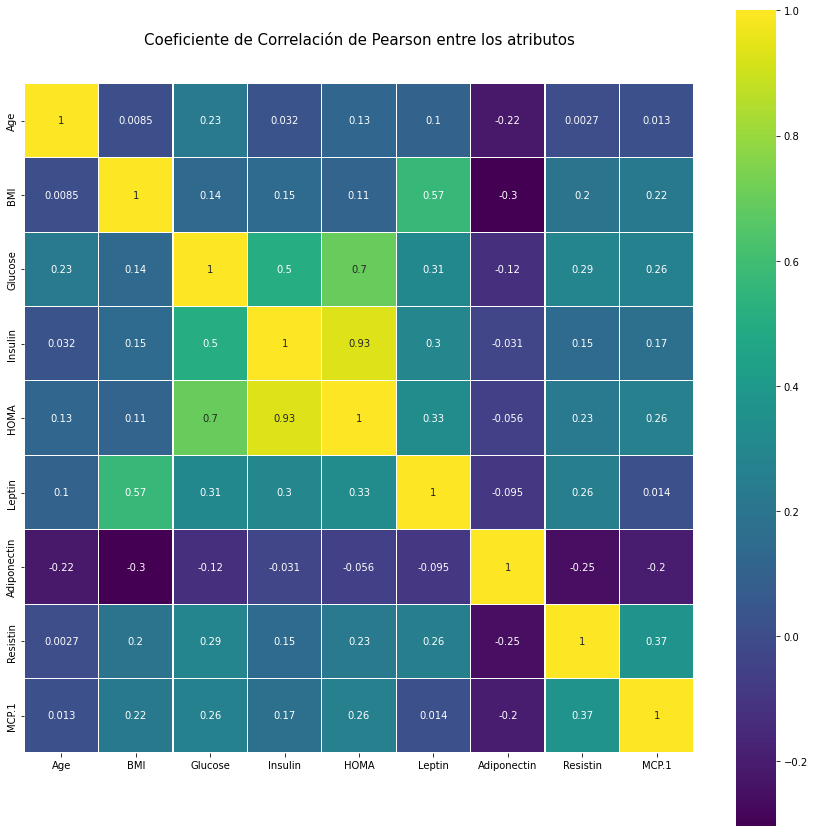

In [12]:
if len(list(filter(lambda x: 'matplotlib ' in x, libraryList))) == 0:
    !{sys.executable} -m pip install matplotlib
    
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.title('Coeficiente de Correlación de Pearson entre los atributos', y=1.05, size=15)
sns.heatmap(X_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='viridis', linecolor='white', annot=True)

El coeficiente refleja la poca correlacion que existen entre los datos. Dentro de los que se destacan podemos mencionar a HOMA e insulina aunque a priori se sugiere que no descartemos ninguna caracteristica para generar un modelo predictivo

La dispersión de los datos es alta. Esto no nos permite ver si hay valores atípicos que podríamos quitar con algún umbral así que analicemos con los *boxplots*:

<AxesSubplot:>

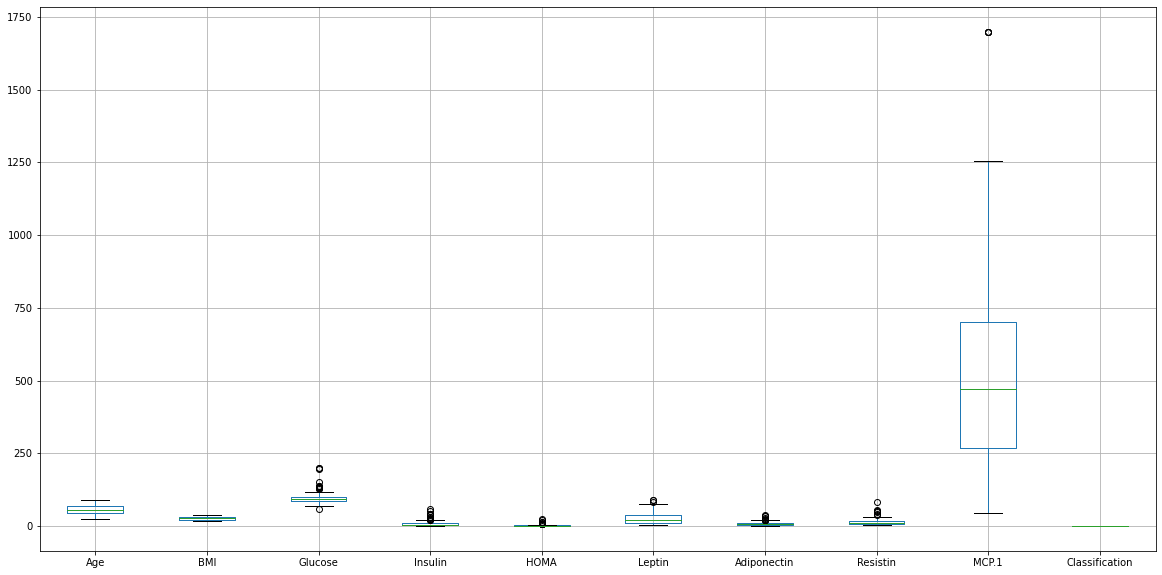

In [13]:
plt.figure(figsize=(20,10))
data.boxplot()

Efectivamente hay dispersión en MCP.1. Considerando que los demás datos no presentas valores atípicos seguiré el estudio con todo el conjunto de datos. Hay que reconocer que si hubiera varios datos atípicos habría que fijar un umbral y luego quitar aquellos que no cumplan las condiciones como por ejemplo usando un *z_score* de nuestra base de datos comos e muestra a continuacion

In [14]:
from scipy import stats

z_scores = np.abs(stats.zscore(data))
print(z_scores)

[[0.57979363 0.81667527 1.23922225 ... 0.54551749 0.34125061 1.10940039]
 [1.60182096 1.37875055 0.25829943 ... 0.86421418 0.1912238  1.10940039]
 [1.53948912 0.89176446 0.30288683 ... 0.4416602  0.05821407 1.10940039]
 ...
 [0.47984774 0.89385486 0.03536242 ... 0.3563202  0.64049127 0.90138782]
 [0.91617066 0.39854568 0.70417344 ... 0.92857684 0.41283214 0.90138782]
 [1.7888165  0.0804471  1.79272102 ... 0.84103616 1.29074683 0.90138782]]


### Aprendizaje de modelos predictivos



#### Algoritmo de Arbol

Decidimos realizar un arbol que genere la predicción deseada dada la reducida cantidad de datos disponibles en el corpus de la Universidad asi como la no correlación a priori de los datos. Las ventajas que nos proporcionara un modelo de arbol son:
* XXXXXXXXXXX
* XXXXXXXXXXX
* XXXXXXXXXXX
* XXXXXXXXXXX
* XXXXXXXXXXX
* XXXXXXXXXXX

Dividimos el conjunto de datos en uno formado por el 75% de las observaciones que será el conjunto de entrenamiento y el test que constará del 25% de los datos:

In [15]:
if len(list(filter(lambda x: 'sklearn ' in x, libraryList))) == 0:
    !{sys.executable} -m pip install sklearn
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(X_data,y_data,test_size = 0.25,
                   random_state=462)

zsh:1: parse error near `-m'


Creamos el arbol correspondiente:

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

Entrenamos el modelo con los datos de entrenamiento y con los parámetros por defecto:

In [17]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

Veamos cuales son las variables de mayor `importancia` en este modelo:

In [18]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
0,Age,0.294
2,Glucose,0.182
1,BMI,0.177
7,Resistin,0.177
6,Adiponectin,0.045
3,Insulin,0.044
8,MCP.1,0.044
5,Leptin,0.039
4,HOMA,0.000


En conclusion las variables de mayor importancia en nuestro modelo son la edad, Glucosa y BMI. La que menos repercusión tiene es Insulina, seguida de HOMA.

Veamos gráficamente cómo es el árbol obtenido:

In [19]:
!conda install --yes --prefix {sys.prefix} python-graphviz==0.19



EnvironmentLocationNotFound: Not a conda environment: /home/germanlorenz/Escritorio/IACD/practice-datos/{sys.prefix}



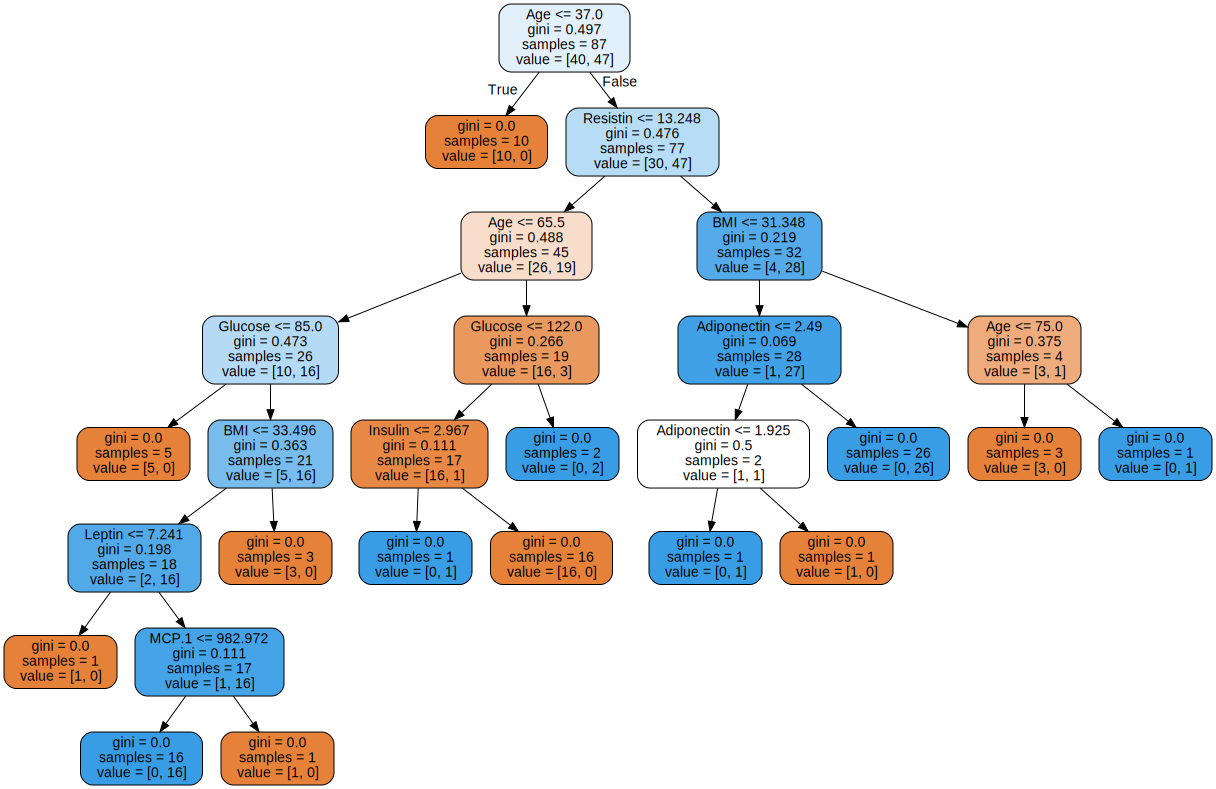

In [20]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display, Image

export_graphviz(
    model,
    out_file="arbol_1.dot",
    feature_names=X_names,
    rounded=True,
    filled=True)

with open("arbol_1.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

Cada nodo interno del árbol anterior muestra información sobre el criterio de separación, el grado de dispersión del nodo, el número de ejemplos del conjunto de entrenamiento asociados a ese nodo y la distribución de valores de clasificación para dichos ejemplos. De esta forma el arbol clasifica todos los ejemplos de nuestro conjunto de entrenamiento.

Vamos a evaluar el rendimiento del árbol calculando el rendimiento con el conjunto de test, luego para obtener una medida de rendimiento, vamos a comparar estos valores con los reales:

In [21]:
pred = model.predict(X_test)
sum(x1==x2 for x1,x2 in zip(pred,y_test))/len(y_test)

0.7931034482758621

El árbol que hemos construido tiene un acierto de más del `76%`. Veámoslo con mayor precisión:

In [22]:
scores_arbol = model.score(X_test,y_test)
print("Rendimiento en el conjunto de entrenamiento: ",model.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",model.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",model.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.7931034482758621
Rendimiento en el conjunto total:  0.9482758620689655


En el conjunto total tenemos un acierto del `94%` y en el conjunto prueba del `76%`. Veamos las matrices de confusión:

In [64]:
from sklearn import metrics as skm

def stats_print(model, y_train, y_test, c=False, acc=True,p=False,r=False,f=False):



    tn, fp, fn, tp = skm.confusion_matrix(y_test, model.predict(X_test)).ravel()
    accuracy = (tn + tp) / (tn + fp + tp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)     
    f1 = ((precision * recall)/(precision + recall)) * 2

    if c:
        print('### Matrices de confusión ###\n')
        print('Entrenamiento:')
        print(skm.confusion_matrix(y_train, model.predict(X_train)))
        print('\nPruebas:')
        print(skm.confusion_matrix(y_test, model.predict(X_test)))
        
    if acc:
        print("\nAccuracy: "+str(accuracy))
    if p:
        print("Precision: "+str(precision))
    if r:
        print("Recall: "+str(recall))
    if f:
        print("F1 Score: " +str(f1))
    
    return(accuracy, precision, recall, f1)


IndentationError: expected an indented block (<ipython-input-64-2c905f531086>, line 5)

En el conjunto de entrenamiento había `40` personas sanas y `47` pacientes con cáncer de mama. El modelo que hemos construido clasifica bien a `10` personas sanas y a `13` personas con cáncer, sin embargo, hay `6` personas a las que ha clasificado de forma incorrecta. Hay `2` personas con cáncer que han sido clasificadas como sanas y `4` sanas clasificadas como pacientes.

### Validación, ajuste (de hiper-parámetros) y evaluación (métricas)

#### Validación cruzada sin estratificación:

Realizaremos una validación cruzada con 10 iteraciones sin estratificación usando como medida <i> accuracy</i>. Para ello se usan las funciones *StratifiedKFold* y *cross_val_score*.

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

cross_validation = StratifiedKFold(n_splits = 10, shuffle = False )
scorescvs = cross_val_score(model, X_train, y_train, 
            scoring = "accuracy", cv = cross_validation, n_jobs = 1 )

scores_cv = scorescvs.mean()
print( "Exactitud (accuracy): %0.5f (+/- %0.5f)" % (scores_cv, scorescvs.std() * 2) )

Exactitud (accuracy): 0.67083 (+/- 0.29503)


Hemos obtenido un rendimiento del `67%`. Vamos a tratar de mejorarlo usando estratificación.

Realizaremos una validación cruzada con 10 iteraciones, usando <i> accuracy </i> y estratificación (*shuffle = True*) :

In [25]:
cross_validation = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 222 )
scorescve = cross_val_score(model, X_train, y_train, 
                                 scoring = "accuracy", cv = cross_validation, n_jobs = 1 )

scores_cv_e = scorescve.mean()
print( "Exactitud (accuracy): %0.5f (+/- %0.5f)" % (scores_cv_e, scorescve.std() * 2) )

Exactitud (accuracy): 0.72222 (+/- 0.30149)


Tenemos un acierto del `70%` el cual no mejora el modelo inicial.

Vamos a ver otras medidas para mejorar el acierto como <i> balanced_accuracy </i> o <i>roc_auc </i> en vez de <i> accuracy </i>: 

In [26]:
scores_bal = cross_val_score(model, X_train, y_train, 
                                 scoring = "balanced_accuracy", cv = cross_validation, n_jobs = 1 )
print( "Exactitud (balanced_accuracy): %0.5f (+/- %0.5f)" % (scores_bal.mean(), scores_bal.std() * 2) )

scores_roc = cross_val_score(model, X_train, y_train, 
                                 scoring = "roc_auc", cv = cross_validation, n_jobs = 1 )
print( "Exactitud (roc_auc): %0.5f (+/- %0.5f)" % (scores_roc.mean(), scores_roc.std() * 2) )

Exactitud (balanced_accuracy): 0.71000 (+/- 0.38549)
Exactitud (roc_auc): 0.68500 (+/- 0.33257)


El arbol obtiene `75%` y `68%` respectivamente.

#### Poda
En general los árboles de decisión tienden a ajustarse demasiado por lo que se les produce sobreajuste con los datos de entrenamiento. En estos casos puede realizarse una poda. La función *DecisionTreeClassifier* cuenta con el parámetro *ccp_alpha* que brinda el valor mínimo y maximo (umbral) que es efectivo. También tenemos el parámetro *cost_complexity_pruning_path* que implementa el proceso de poda y devuelve tanto los valores de $\alpha$ efectivos como las impurezas.


In [27]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Verificamos los datos obtenidos:

Text(0.5, 1.0, 'Impureza total frente a alpha efectiva para el conjunto de entrenamiento')

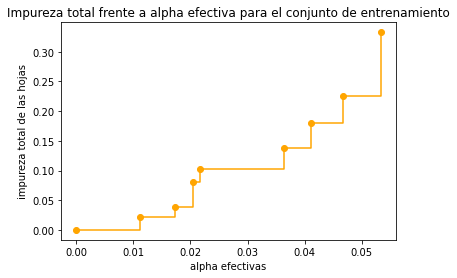

In [28]:
ig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post", color='orange')
ax.set_xlabel("alpha efectivas")
ax.set_ylabel("impureza total de las hojas")
ax.set_title("Impureza total frente a alpha efectiva para el conjunto de entrenamiento")

Ahora, entrenamos un árbol de decisión usando los valores efectivos de alpha. El último valor de *ccp_alphas* es el valor alpha que poda todo el árbol, dejando el árbol con un solo nodo.

In [29]:
arboles_poda = []
for ccp_alpha in ccp_alphas:
    arbol_poda = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    arbol_poda.fit(X_train, y_train)
    arboles_poda.append(arbol_poda)
print("El número de nodos en el último árbol es: {} para ccp_alpha: {}".format(
      arboles_poda[-1].tree_.node_count, ccp_alphas[-1]))

El número de nodos en el último árbol es: 1 para ccp_alpha: 0.08197031752323072


Eliminamos el último elemento de *arbol_poda* y *ccp_alphas* ya que es el árbol formado por un solo nodo.

In [30]:
arboles_poda = arboles_poda[:-1]
ccp_alphas = ccp_alphas[:-1]

Veamos cómo varía el rendimiento para los distintos valores de alpha:

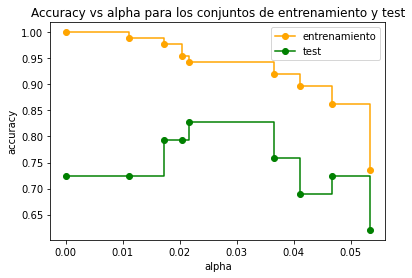

In [31]:
train_scores = [arbol_poda.score(X_train, y_train) for arbol_poda in arboles_poda]
test_scores = [arbol_poda.score(X_test, y_test) for arbol_poda in arboles_poda]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha para los conjuntos de entrenamiento y test")
ax.plot(ccp_alphas, train_scores, marker='o', label="entrenamiento",
        drawstyle="steps-post", color='orange')
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post", color='green')
ax.legend()
plt.show()

Veamos cuál es el mejor valor:

In [32]:
index_best_model = np.argmax(test_scores)
best_model = arboles_poda[index_best_model]
scores_poda = best_model.score(X_test, y_test)
print('Accuracy del mejor modelo en el conjunto de entrenamiento: ',best_model.score(X_train, y_train))
print('Accuracy del mejor modelo en el conjunto test: ',scores_poda)

Accuracy del mejor modelo en el conjunto de entrenamiento:  0.9425287356321839
Accuracy del mejor modelo en el conjunto test:  0.8275862068965517


El rendimiento es del `83%`, luego es una mejora a los anteriores. Veamos también el árbol podado resultante:

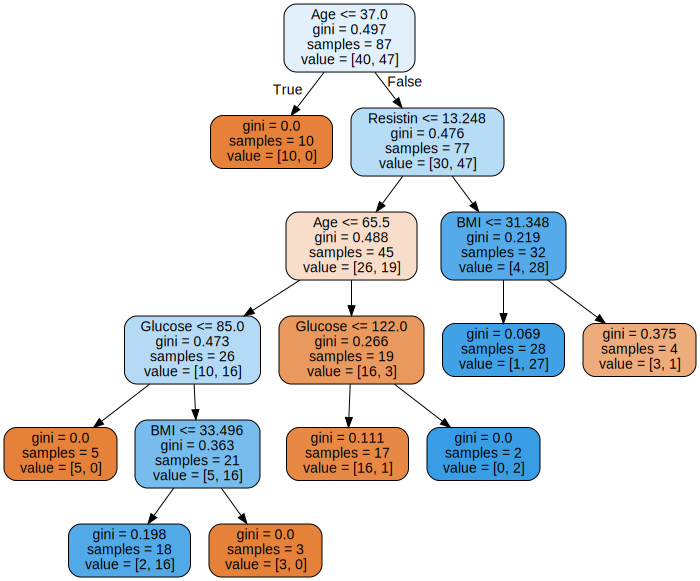

In [33]:
export_graphviz(
    best_model,
    out_file="arbol_2.dot",
    feature_names=X_names,
    rounded=True,
    filled=True)
with open("arbol_2.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

Obtenemos un árbol podado de profundidad `6`. Como podemos observar es un árbol mucho más pequeño que el inicial y con un gran rendimiento.


#### Redes Multicapa hacia adelante.

Decidimos realizar un tratamiento con redes multicapa ya que de esta forma podremos comparar un modelo con logica por nodo contra uno que posee la misma logica en todas sus neuronas y desde enfoques completamente distintos evaluar cual es mas eficiente y mas eficaz

El módulo para trabajar que usaremos en scikit_learn es `neural_network`, y dentro del mismo `MLPClassifier`.
Nosotros con ello construiremos nuestra red neuronal y entrenaremos el modelo con nuestros datos de entrenamiento y dejando los parámetros por defecto, excepto el número de iteraciones que tenemos que aumentarlo para que el algoritmo converja.

Antes de empezar a procesar los datos hay que hacer un preprocesamiento para normalizarlos:

In [34]:
from sklearn import preprocessing
X_norm_cancer = preprocessing.normalize(data)

Clasificamos con *one-hot* las etiquetas:

In [35]:
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
y_cancer_reshaped = data.Classification.to_numpy()
y_cancer = onehot_encoder.fit_transform(y_cancer_reshaped.reshape(-1, 1))
y_cancer[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### Validación y ajuste (de hiper-parámetros)

#### Número de capas

En primer lugar, vamos a definir como sistema de optimización LBFGS (optimizador de la familia de los métodos cuasi-Newton) ya que usualmente converge mejor con conjuntos de datos pequeños ya que la dimensión de su matriz hessiana no será tan grande. Para nuestro conjunto de datos elegiremos una capa oculta con 100 unidades (parámetro por defecto). Luego probaremos otras configuraciones:

In [36]:
from sklearn.neural_network import MLPClassifier
def layers_test(capas, X_train, y_train, X_test,y_test, informe=False, solver='adam',activation='relu'):
    model = MLPClassifier(solver=solver,max_iter=10000, random_state=22, hidden_layer_sizes=capas, activation=activation)
    model.fit(X_train, y_train)
    if informe:
        print("Rendimiento en el conjunto de entrenamiento: ",model.score(X_train,y_train))
        print("Rendimiento en el conjunto de prueba: ",model.score(X_test,y_test))
    return model.score(X_test,y_test)

Veamos una sola capa con 100 unidades:

In [60]:
score_100_lbfgs = layers_test((100,), X_train, y_train, X_test,y_test, informe=True, solver='lbfgs')

Rendimiento en el conjunto de entrenamiento:  0.9310344827586207
Rendimiento en el conjunto de prueba:  0.7241379310344828


Creamos una funcion para imprimir resultados

In [38]:
def plot_result_MLPC(eval_data):
    fig, ax = plt.subplots()
    ax.set_xlabel("numero de unidades")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy por numero de unidades")

    numero_capa = []
    eval_capa = []
    for x in range(len(eval_data)): numero_capa.append(eval_data[x][0])
    for x in range(len(eval_data)): eval_capa.append(eval_data[x][1])
    ax.plot(eval_capa, numero_capa,'o',markersize=2, LineStyle="-")

Intentemos con mas distintas cantidades de unidades en la misma capa

Rendimiento en el conjunto de prueba:  0.6896551724137931  con  10  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.6206896551724138  con  15  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.6206896551724138  con  20  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.7586206896551724  con  25  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.6551724137931034  con  30  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.6551724137931034  con  35  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.6551724137931034  con  40  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.6551724137931034  con  45  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.6896551724137931  con  50  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.6551724137931034  con  55  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.6206896551724138  con  60  tamaño en capa oculta
Rendimient

/home/germanlorenz/anaconda3/envs/iacd/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()


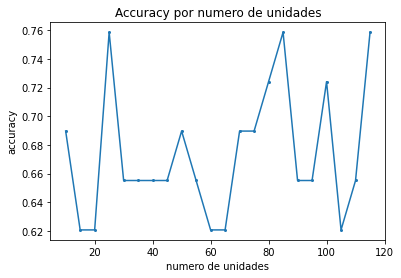

In [39]:
eval_data_lbfgs = []
for x in range (10,120,5):
    eval_data_lbfgs.append([layers_test((x,), X_train, y_train, X_test,y_test, False, 'lbfgs'), x])
    print("Rendimiento en el conjunto de prueba: ", eval_data_lbfgs[-1][0]," con ",x, " tamaño en capa oculta")

plot_result_MLPC(eval_data_lbfgs)

Aparentemente la cantidad de unidades en una capa con lbfgs no es un factor significativo y el modelo es inestable

Intentemos con mas distintas cantidades de unidades en la misma capa pero con adam

In [51]:
score_100_adam = layers_test((100,), X_train, y_train, X_test,y_test, informe=True, solver='adam')

Rendimiento en el conjunto de entrenamiento:  0.9425287356321839
Rendimiento en el conjunto de prueba:  0.8275862068965517


Rendimiento en el conjunto de prueba:  0.5862068965517241  con  10  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.41379310344827586  con  15  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.5172413793103449  con  20  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.5517241379310345  con  25  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.6896551724137931  con  30  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.7241379310344828  con  35  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.6206896551724138  con  40  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.6206896551724138  con  45  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.6206896551724138  con  50  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.7241379310344828  con  55  tamaño en capa oculta
Rendimiento en el conjunto de prueba:  0.6551724137931034  con  60  tamaño en capa oculta
Rendimien

/home/germanlorenz/anaconda3/envs/iacd/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()


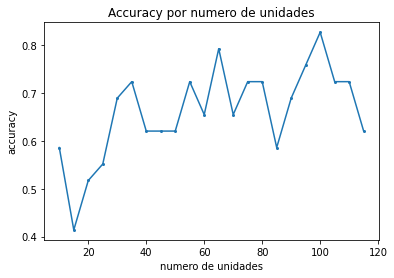

In [40]:
eval_data_adam = []
for x in range (10,120,5):
    eval_data_adam.append([layers_test((x,), X_train, y_train, X_test,y_test, False, 'adam'), x])
    print("Rendimiento en el conjunto de prueba: ", eval_data_adam[-1][0]," con ",x, " tamaño en capa oculta")

plot_result_MLPC(eval_data_adam)

Podemos apreciar que ADAM es más estable y con los datos ya alcanza un buen rendimiento con solo 40 unidades. Por otro lado, LFGS toma ventaja con 20 unidades pero la detección de todos los casos de prueba indica que el modelo puede no ser fiable

Analicemos ahora si agregar más capas ocultas mejora los resultados previamente obtenidos probando combinaciones entre 10 a 100 unidades con saltos de a 2 unidades con 2 unidades para su salida

In [41]:
eval_multilayer = []
for i in range (10, 100, 2):
    for j in range (10, 100, 3):
        eval_multilayer.append([i,j,2, layers_test((i,j,2), X_train, y_train, X_test,y_test, False, 'adam')])
        print(eval_multilayer[-1])

[10, 10, 2, 0.5517241379310345]
[10, 13, 2, 0.41379310344827586]
[10, 16, 2, 0.41379310344827586]
[10, 19, 2, 0.6206896551724138]
[10, 22, 2, 0.5172413793103449]
[10, 25, 2, 0.5862068965517241]
[10, 28, 2, 0.6551724137931034]
[10, 31, 2, 0.41379310344827586]
[10, 34, 2, 0.41379310344827586]
[10, 37, 2, 0.5862068965517241]
[10, 40, 2, 0.41379310344827586]
[10, 43, 2, 0.5862068965517241]
[10, 46, 2, 0.41379310344827586]
[10, 49, 2, 0.6206896551724138]
[10, 52, 2, 0.5862068965517241]
[10, 55, 2, 0.5862068965517241]
[10, 58, 2, 0.41379310344827586]
[10, 61, 2, 0.5862068965517241]
[10, 64, 2, 0.5517241379310345]
[10, 67, 2, 0.41379310344827586]
[10, 70, 2, 0.41379310344827586]
[10, 73, 2, 0.41379310344827586]
[10, 76, 2, 0.41379310344827586]
[10, 79, 2, 0.6206896551724138]
[10, 82, 2, 0.5862068965517241]
[10, 85, 2, 0.5862068965517241]
[10, 88, 2, 0.5862068965517241]
[10, 91, 2, 0.41379310344827586]
[10, 94, 2, 0.6896551724137931]
[10, 97, 2, 0.5862068965517241]
[12, 10, 2, 0.41379310344827

[26, 49, 2, 0.5862068965517241]
[26, 52, 2, 0.41379310344827586]
[26, 55, 2, 0.5862068965517241]
[26, 58, 2, 0.41379310344827586]
[26, 61, 2, 0.5172413793103449]
[26, 64, 2, 0.5862068965517241]
[26, 67, 2, 0.41379310344827586]
[26, 70, 2, 0.41379310344827586]
[26, 73, 2, 0.5862068965517241]
[26, 76, 2, 0.41379310344827586]
[26, 79, 2, 0.41379310344827586]
[26, 82, 2, 0.41379310344827586]
[26, 85, 2, 0.41379310344827586]
[26, 88, 2, 0.5862068965517241]
[26, 91, 2, 0.41379310344827586]
[26, 94, 2, 0.5862068965517241]
[26, 97, 2, 0.41379310344827586]
[28, 10, 2, 0.5862068965517241]
[28, 13, 2, 0.5862068965517241]
[28, 16, 2, 0.5862068965517241]
[28, 19, 2, 0.6551724137931034]
[28, 22, 2, 0.41379310344827586]
[28, 25, 2, 0.5862068965517241]
[28, 28, 2, 0.5862068965517241]
[28, 31, 2, 0.41379310344827586]
[28, 34, 2, 0.41379310344827586]
[28, 37, 2, 0.7241379310344828]
[28, 40, 2, 0.5862068965517241]
[28, 43, 2, 0.41379310344827586]
[28, 46, 2, 0.5862068965517241]
[28, 49, 2, 0.689655172413

[42, 94, 2, 0.6551724137931034]
[42, 97, 2, 0.5862068965517241]
[44, 10, 2, 0.5862068965517241]
[44, 13, 2, 0.41379310344827586]
[44, 16, 2, 0.4827586206896552]
[44, 19, 2, 0.41379310344827586]
[44, 22, 2, 0.5517241379310345]
[44, 25, 2, 0.41379310344827586]
[44, 28, 2, 0.5862068965517241]
[44, 31, 2, 0.6206896551724138]
[44, 34, 2, 0.41379310344827586]
[44, 37, 2, 0.41379310344827586]
[44, 40, 2, 0.5862068965517241]
[44, 43, 2, 0.41379310344827586]
[44, 46, 2, 0.5172413793103449]
[44, 49, 2, 0.41379310344827586]
[44, 52, 2, 0.41379310344827586]
[44, 55, 2, 0.4482758620689655]
[44, 58, 2, 0.5862068965517241]
[44, 61, 2, 0.5862068965517241]
[44, 64, 2, 0.41379310344827586]
[44, 67, 2, 0.41379310344827586]
[44, 70, 2, 0.5862068965517241]
[44, 73, 2, 0.5862068965517241]
[44, 76, 2, 0.41379310344827586]
[44, 79, 2, 0.5862068965517241]
[44, 82, 2, 0.5862068965517241]
[44, 85, 2, 0.5862068965517241]
[44, 88, 2, 0.41379310344827586]
[44, 91, 2, 0.5862068965517241]
[44, 94, 2, 0.58620689655172

[60, 46, 2, 0.41379310344827586]
[60, 49, 2, 0.41379310344827586]
[60, 52, 2, 0.5862068965517241]
[60, 55, 2, 0.41379310344827586]
[60, 58, 2, 0.5862068965517241]
[60, 61, 2, 0.4482758620689655]
[60, 64, 2, 0.5862068965517241]
[60, 67, 2, 0.5862068965517241]
[60, 70, 2, 0.5862068965517241]
[60, 73, 2, 0.5862068965517241]
[60, 76, 2, 0.5862068965517241]
[60, 79, 2, 0.5862068965517241]
[60, 82, 2, 0.5862068965517241]
[60, 85, 2, 0.5862068965517241]
[60, 88, 2, 0.5862068965517241]
[60, 91, 2, 0.6206896551724138]
[60, 94, 2, 0.7241379310344828]
[60, 97, 2, 0.5862068965517241]
[62, 10, 2, 0.41379310344827586]
[62, 13, 2, 0.41379310344827586]
[62, 16, 2, 0.41379310344827586]
[62, 19, 2, 0.5862068965517241]
[62, 22, 2, 0.41379310344827586]
[62, 25, 2, 0.41379310344827586]
[62, 28, 2, 0.7586206896551724]
[62, 31, 2, 0.5862068965517241]
[62, 34, 2, 0.41379310344827586]
[62, 37, 2, 0.4482758620689655]
[62, 40, 2, 0.5862068965517241]
[62, 43, 2, 0.5862068965517241]
[62, 46, 2, 0.6896551724137931]

[78, 13, 2, 0.41379310344827586]
[78, 16, 2, 0.5862068965517241]
[78, 19, 2, 0.41379310344827586]
[78, 22, 2, 0.41379310344827586]
[78, 25, 2, 0.5862068965517241]
[78, 28, 2, 0.7586206896551724]
[78, 31, 2, 0.41379310344827586]
[78, 34, 2, 0.5862068965517241]
[78, 37, 2, 0.6551724137931034]
[78, 40, 2, 0.7586206896551724]
[78, 43, 2, 0.6206896551724138]
[78, 46, 2, 0.41379310344827586]
[78, 49, 2, 0.5862068965517241]
[78, 52, 2, 0.4827586206896552]
[78, 55, 2, 0.5862068965517241]
[78, 58, 2, 0.5862068965517241]
[78, 61, 2, 0.5862068965517241]
[78, 64, 2, 0.7241379310344828]
[78, 67, 2, 0.41379310344827586]
[78, 70, 2, 0.5862068965517241]
[78, 73, 2, 0.41379310344827586]
[78, 76, 2, 0.41379310344827586]
[78, 79, 2, 0.5862068965517241]
[78, 82, 2, 0.5862068965517241]
[78, 85, 2, 0.41379310344827586]
[78, 88, 2, 0.5862068965517241]
[78, 91, 2, 0.5862068965517241]
[78, 94, 2, 0.5862068965517241]
[78, 97, 2, 0.5862068965517241]
[80, 10, 2, 0.41379310344827586]
[80, 13, 2, 0.5862068965517241

[94, 64, 2, 0.41379310344827586]
[94, 67, 2, 0.4827586206896552]
[94, 70, 2, 0.41379310344827586]
[94, 73, 2, 0.6896551724137931]
[94, 76, 2, 0.5862068965517241]
[94, 79, 2, 0.5862068965517241]
[94, 82, 2, 0.41379310344827586]
[94, 85, 2, 0.5862068965517241]
[94, 88, 2, 0.41379310344827586]
[94, 91, 2, 0.6896551724137931]
[94, 94, 2, 0.41379310344827586]
[94, 97, 2, 0.5862068965517241]
[96, 10, 2, 0.41379310344827586]
[96, 13, 2, 0.41379310344827586]
[96, 16, 2, 0.5862068965517241]
[96, 19, 2, 0.41379310344827586]
[96, 22, 2, 0.5862068965517241]
[96, 25, 2, 0.41379310344827586]
[96, 28, 2, 0.41379310344827586]
[96, 31, 2, 0.41379310344827586]
[96, 34, 2, 0.5862068965517241]
[96, 37, 2, 0.6896551724137931]
[96, 40, 2, 0.5862068965517241]
[96, 43, 2, 0.41379310344827586]
[96, 46, 2, 0.5862068965517241]
[96, 49, 2, 0.5862068965517241]
[96, 52, 2, 0.41379310344827586]
[96, 55, 2, 0.7586206896551724]
[96, 58, 2, 0.41379310344827586]
[96, 61, 2, 0.41379310344827586]
[96, 64, 2, 0.62068965517

Ordenemos los modelos para obtener los mejores:

In [42]:
np.set_printoptions(suppress=True)
eval_multilayer = np.array(eval_multilayer)
eval_multilayer = eval_multilayer[np.argsort(eval_multilayer[:, 3])]
eval_multilayer

array([[58.        , 52.        ,  2.        ,  0.37931034],
       [70.        , 40.        ,  2.        ,  0.4137931 ],
       [34.        , 76.        ,  2.        ,  0.4137931 ],
       ...,
       [30.        , 52.        ,  2.        ,  0.82758621],
       [20.        , 55.        ,  2.        ,  0.82758621],
       [84.        , 79.        ,  2.        ,  0.82758621]])

Luego del análisis exploratorio con 2 capas en profundidad y 2 en la ultima capa de salida encontramos que el modelo de una sola capa con 100 unidades es extremadamente eficiente. Por otro lado, los 3 mejores modelos encontrados tienen la siguiente configuración:

[100, Rendimiento = 0.82758621]

[30, 52, 2, Rendimiento = 0.82758621]

[20, 55, 2, Rendimiento = 0.82758621]

[84, 79, 2, Rendimiento = 0.82758621]

#### Función de activación
En este apartado se va a estudiar la función de activación para la capa oculta. Los valores que puede tomar son:

* *identity*: activación sin operación, devuelve $f(x) = x$
* *logistic*: función sigmoide, devuelve $f (x) = \frac{1}{1 + e^{-x}}$
* *tanh*: función tangente hiperbólica, devuelve $f(x) = tanh(x)$
* *relu*: función de unidad lineal, devuelve $f(x) = max(0, x)$

Probamos los 3 mejores modelos multicapa con las distintas funciones de activación

In [43]:
activations = ["identity","logistic","tanh", "relu"]
modelos = [(100), (30,52,2), (20,55,2), (84,79,2)]
eval_f_activations = []
for model in modelos:
    for activation in activations:
        eval_f_activations.append([model, activation, layers_test(model, X_train, y_train, X_test,y_test, False, 'adam', activation)])
        print(eval_f_activations[-1])

[100, 'identity', 0.6551724137931034]
[100, 'logistic', 0.6206896551724138]
[100, 'tanh', 0.6896551724137931]
[100, 'relu', 0.8275862068965517]
[(30, 52, 2), 'identity', 0.5862068965517241]
[(30, 52, 2), 'logistic', 0.5862068965517241]
[(30, 52, 2), 'tanh', 0.5862068965517241]
[(30, 52, 2), 'relu', 0.8275862068965517]
[(20, 55, 2), 'identity', 0.7241379310344828]
[(20, 55, 2), 'logistic', 0.6896551724137931]
[(20, 55, 2), 'tanh', 0.7241379310344828]
[(20, 55, 2), 'relu', 0.8275862068965517]
[(84, 79, 2), 'identity', 0.6896551724137931]
[(84, 79, 2), 'logistic', 0.5862068965517241]
[(84, 79, 2), 'tanh', 0.7586206896551724]
[(84, 79, 2), 'relu', 0.8275862068965517]


In [44]:
np.set_printoptions(suppress=True)
eval_f_activations = np.array(eval_f_activations)
eval_f_activations = eval_f_activations[np.argsort(eval_f_activations[:, 2])]
eval_f_activations

/home/germanlorenz/anaconda3/envs/iacd/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([[(30, 52, 2), 'identity', 0.5862068965517241],
       [(30, 52, 2), 'logistic', 0.5862068965517241],
       [(30, 52, 2), 'tanh', 0.5862068965517241],
       [(84, 79, 2), 'logistic', 0.5862068965517241],
       [100, 'logistic', 0.6206896551724138],
       [100, 'identity', 0.6551724137931034],
       [100, 'tanh', 0.6896551724137931],
       [(20, 55, 2), 'logistic', 0.6896551724137931],
       [(84, 79, 2), 'identity', 0.6896551724137931],
       [(20, 55, 2), 'identity', 0.7241379310344828],
       [(20, 55, 2), 'tanh', 0.7241379310344828],
       [(84, 79, 2), 'tanh', 0.7586206896551724],
       [100, 'relu', 0.8275862068965517],
       [(30, 52, 2), 'relu', 0.8275862068965517],
       [(20, 55, 2), 'relu', 0.8275862068965517],
       [(84, 79, 2), 'relu', 0.8275862068965517]], dtype=object)

Podemos observar que con ReLU se obtienen los resultados mas significativo en las configuraciones pre-seleccionadas 

Por ultimo, se va a hacer un estudio en el que se varían varios parámetros a la vez para buscar la mejor red neuronal. Para ello vamos a usar *GridSearchCV*.

In [45]:
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'hidden_layer_sizes': modelos,
    'activation': activations,
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init' : [0.001, 0.01, 0.05, 0.1],
}
model = MLPClassifier(max_iter=10000, random_state=22)
clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=3, verbose=10)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=10000, random_state=22),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [100, (30, 52, 2), (20, 55, 2),
                                                (84, 79, 2)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01, 0.05, 0.1],
                         'solver': ['sgd', 'adam', 'lbfgs']},
             verbose=10)

In [47]:
print('La mejor medida es {}'.format(clf.best_score_))
print('Y se consigue para los parámetros{}'.format(clf.best_params_))

La mejor medida es 0.7471264367816092
Y se consigue para los parámetros{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 55, 2), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'sgd'}


La función GridSearchCV determino que de entre todas las opciones a modelizar la mejor  posee la sigueinte configuracion:
* x
* x
* x


### Evaluación final del modelo

Por último, veamos una tabla resumen de los modelos que hemos usado y sus rendimientos.

In [63]:
if len(list(filter(lambda x: 'tabulate ' in x, libraryList))) == 0:
    !{sys.executable} -m pip install tabulate
    
from tabulate import tabulate
rend = [['Árbol base con validación cruzada sin estratificación', scores_cv],
        ['Árbol base con validación cruzada con estratificación', scores_cv_e],
        ['RN (100) LGFGS con ReLU ', score_100_lbfgs],
        ['Árbol base', scores_arbol],
        ['Árbol podado',scores_poda], 
        ['RN (100) adam con ReLU', score_100_adam],
        ['RN (30,52,2) adam con ReLU',eval_multilayer[-3][3]],
        ['RN (20,55,2) adam con ReLU',eval_multilayer[-2][3]],
        ['RN (84,79,2) adam con ReLU',eval_multilayer[-1][3]]]     
      
print(tabulate(rend, headers=['Modelo', 'Rendimiento']))


#stats_print()
# def stats_print(model, y_train, y_test, c=False, acc=True,p=False,r=False,f=False):

zsh:1: parse error near `-m'
Modelo                                                   Rendimiento
-----------------------------------------------------  -------------
Árbol base con validación cruzada sin estratificación       0.670833
Árbol base con validación cruzada con estratificación       0.722222
RN (100) LGFGS con ReLU                                     0.724138
Árbol base                                                  0.793103
Árbol podado                                                0.827586
RN (100) adam con ReLU                                      0.827586
RN (30,52,2) adam con ReLU                                  0.827586
RN (20,55,2) adam con ReLU                                  0.827586
RN (84,79,2) adam con ReLU                                  0.827586


In [ ]:
def f_optimiza(model, , typemodel, param1, param2, param3, param4):
    valores = []
    for i in range(len(param1)):
        for j in range(len(param2)):
            for k in range(len(param3)):
                for l in range(len(param4)):
                    if typemodel == 'dsdsdsds':
                         model.fit(sadjhijsdhdssdhj, param=param[1])
                    elif typemodel == 'dcsfker'
                        model.fit(sadjhijsdhdssdhj, param=param[1])
                        valores.append(param1, param2, param3, param4, model, model.score)
                        
                    else:
                        return 0
    np.ordenar(valores)
    
    np.set_printoptions(suppress=True)
    valores = np.array(valores)
    valores_ord = eval_multilayer[np.argsort(valores[:, 3])] # ver la de score
    return valores_ord

El árbol podado tiene un rendimiento de `83%`. Es el mejor modelo tanto en efectividad como en tamaño para predecir el cáncer de mama a través de los atributos: Edad, IMC, Glucosa, HOMA, Insulina, Adiponectina, Leptina, Resistina y MCP-1 del set de datos.

ultimo markdown asi vamos cargando los titulos


### Ingeniería y selección de características. El uso de técnicas de selección de características y/o de reducción de la dimensionalidad será decisión del alumno.
### Aprendizaje de modelos predictivos (clasificación o regresión). Debe probarse más de un algoritmo para obtener el mayor rendimiento posible.
### Validación, ajuste (de hiper-parámetros) y evaluación (métricas) de los distintos modelos candidatos
### Evaluación final del modelo finalmente seleccionado y presentación de resultados.